In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import numpy as np
from operator import itemgetter
df = pd.read_excel('lianjia-11-15.xlsx')
df2 = pd.read_excel('[20171201]海淀租房.xlsx')
df3 = pd.read_excel('深圳南山区房-1218.xlsx');
%matplotlib inline

In [6]:
coldir = {
    '列-1':'title',
    '列-1-链接':'title-href',
    '列-2':'rent',
    '列-3':'community',
    '列-3-链接':'add-href',
    '列-4':'type',
    '列-5':'area',
    '列-6':'toward',
    '列-7':'address',
    '列-8':'subway',
    '列-9':'count',
}
def replace_zufang(value):
    value = value.replace('租房','')
    return value.replace('租房','')
def replace_pingmi(value):
    value = value.replace('平米','')
    return value.replace('平米','')
def fomateDf(data):
    df = data
    df.rename(columns = coldir ,inplace = True)
    df.drop(['列-7-链接','来源网址','add-href'],axis = 1,inplace=True)
    df['address'] = df['address'].apply(replace_zufang)
    df['area'] = df['area'].apply(replace_pingmi)
    return df
    


In [7]:
df = fomateDf(df)
df2 = fomateDf(df2)
df3 = fomateDf(df3)

In [24]:

# df[df['community'] == '']
# df

In [9]:
def drawCountPlt(data,name):
    pd.value_counts(data['address']).plot.bar(
        figsize=(20,5),
        rot=45,
        fontsize=18,
        title=(name + '房源数量')
    )

In [25]:


# drawCountPlt(df,'11-10')


In [26]:
# drawCountPlt(df2,'12-01')

In [12]:
def getPerAreaRent(df):
    value = set( df['address'].values.tolist() )
    rent_list = []
    for item in value:
        flag = (df['address'] == item)
        rent = df[flag]['rent'].astype(int)
        area = df[flag]['area'].astype(int)
        rent_list.append({
            'value':round(rent.mean() / area.mean(),2), 
            'name':item
        })
    rent_mean_list = sorted(rent_list,key = itemgetter('value'),reverse = True)
    return rent_mean_list

In [27]:
df1list = getPerAreaRent(df)
# df1list

In [28]:
df2list = getPerAreaRent(df2)
# df2list

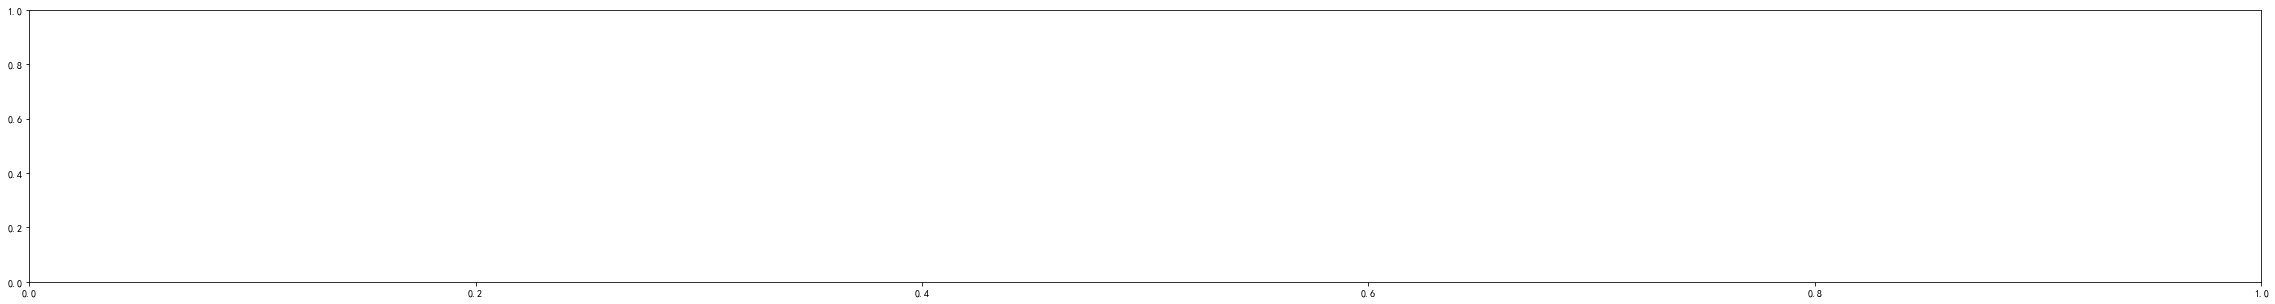

In [29]:



def getDir(arr):
    rs = {}
    for i in arr:
        name = i['name']
        val = i['value']
        rs[name] = val;
    return rs;

def getBoth(list1,list2):
    rs1 = {
        'name':[],
        'value':[]
    }
    rs2 = {
        'name':[],
        'value':[]
    }
    dir1 = getDir(list1)
    dir2 = getDir(list2)
    
    list2_name = [i['name'] for i in list2]
    for item in list1:
        iname = item['name']
#         如果某项1、2list都有则加入对比表
        if(iname in list2_name):
            rs1['name'].append(iname)
            rs1['value'].append(dir1[iname])
            rs2['value'].append(dir2[iname])
        
    rs2['name'] = rs1['name']
    return rs1,rs2
    
df1plot,df2plot = getBoth(df1list[:],df2list[:])
fig, ax = plt.subplots(figsize = (40,5))
def drawPlot(df1plot,df2plot,title):
    bar_width = 0.5
    x_index = np.arange(0,len(df1plot['name']) * 1.8,1.8)
    # print(x_index)
    x_index_width = 0.5
    ax.bar(x_index,df1plot['value'],bar_width)
    ax.bar(x_index + 0.8,df2plot['value'],bar_width)

    for x,y in zip(x_index,df1plot['value']):
        plt.text(x+0.3, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

    for x,y in zip(x_index,df2plot['value']):
        plt.text(x+0.6, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

    ax.set_title(title)
    plt.yticks(fontsize = 18)
    plt.xticks(x_index + x_index_width * 0.5, df1plot['name'],fontsize = 18,rotation = 40)
    plt.show()
# drawPlot(df1plot,df2plot,'每平米价格')


In [16]:
def getPerCommunity(df,address):
    supFlag = df['address'] == address
    value = set( df[supFlag]['community'].values.tolist() )
    
    rent_list = []
    for item in value:
        flag = (df['community'] == item)
        rent = df[flag]['rent'].astype(int)
        area = df[flag]['area'].astype(int)
        rent_list.append({
            'value':round(rent.mean() / area.mean(),2), 
            'name':item
        })
    rent_mean_list = sorted(rent_list,key = itemgetter('value'),reverse = True)
    return rent_mean_list

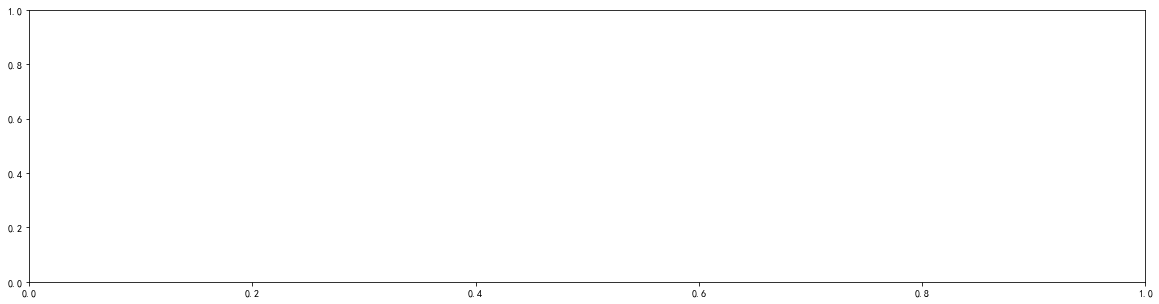

In [30]:
add = '清河'
# def drawCom(address):
df1comlist = getPerCommunity(df,add)
df2comlist = getPerCommunity(df2,add)

fig, ax = plt.subplots(figsize = (20,5))
df1complot,df2complot = getBoth(df1comlist,df2comlist)
# drawPlot(df1complot,df2complot,add+'各小区每平米价格')


In [18]:
# addList = set( df['address'].values.tolist() )

In [19]:
# for i in addList.tolist():
#     addList(i)

In [20]:
df3

,title,title-href,rent,community,type,area,toward,address,subway,count
0,麒麟花园一房 步行到腾讯 家私家电齐全 业主人很好,https://sz.lianjia.com/zufang/105101103300.html,4200,麒麟花园,1室0厅,40,北,南头,随时看房,21
1,金海岸大厦 1室1厅 4600元,https://sz.lianjia.com/zufang/105101142540.html,4600,金海岸大厦,1室1厅,43,北,后海,随时看房,11
2,西海明珠精装四房改三房 超大卧室 纵览深大 仅需10000,https://sz.lianjia.com/zufang/105101143072.html,10000,西海明珠花园,3室1厅,111,南,南头,距离1号线(罗宝线）桃园站712米,2
3,"麒麟花园居家三房家电齐全,拎包入住,业主成心出租",https://sz.lianjia.com/zufang/105100985505.html,7800,麒麟花园,3室1厅,109,南 北,南头,随时看房,24
4,华侨城天鹅堡+精装4房+采光通风,https://sz.lianjia.com/zufang/105100804643.html,22000,天鹅堡,5室2厅,210,南,华侨城,随时看房,28
5,栖游家园 2室1厅 7500元,https://sz.lianjia.com/zufang/105101029147.html,7500,栖游家园,2室1厅,74,西南,蛇口,距离2号线(蛇口线)东角头站751米,22
6,俊峰方正大两房 高楼层 采光明亮！,https://sz.lianjia.com/zufang/105101148153.html,6500,俊峰丽舍,2室1厅,77,东北,西丽,距离7号线桃源村站503米,8
7,金海岸大厦 2室1厅 5200元,https://sz.lianjia.com/zufang/105101137110.html,5200,金海岸大厦,2室1厅,46,东南,后海,随时看房,18
8,深蓝季节 1室1厅 4400元,https://sz.lianjia.com/zufang/105101140380.html,4400,深蓝季节,1室1厅,35,东,后海,随时看房,16
9,桃源村三期两房，采光好。宜居家。,https://sz.lianjia.com/zufang/105101143014.html,5700,桃源村三期,2室2厅,70,南,西丽,距离7号线桃源村站792米,7


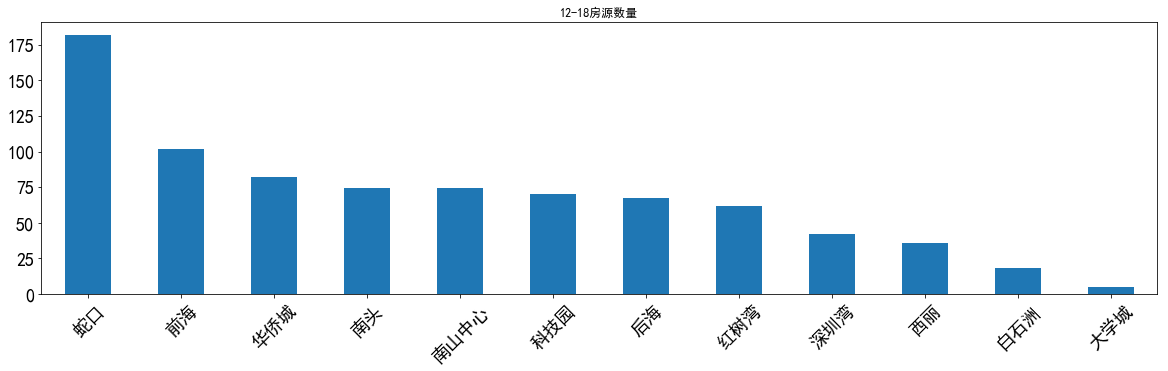

In [21]:
drawCountPlt(df3,'12-18')

In [23]:
df3list = getPerAreaRent(df3)
df3list

[{'name': '深圳湾', 'value': 240.61},
 {'name': '红树湾', 'value': 174.18},
 {'name': '蛇口', 'value': 129.03},
 {'name': '华侨城', 'value': 117.55},
 {'name': '前海', 'value': 115.9},
 {'name': '科技园', 'value': 115.57},
 {'name': '后海', 'value': 110.84},
 {'name': '南山中心', 'value': 101.83},
 {'name': '西丽', 'value': 101.74},
 {'name': '南头', 'value': 88.73},
 {'name': '白石洲', 'value': 83.12},
 {'name': '大学城', 'value': 66.93}]